## 합성곱 신경망 소개

합성곱 신경망(Convolutional Neural Networks, CNN)은 이미지나 비디오 등의 공간적 구조를 가진 데이터를 처리하는 데 유용한 딥러닝 모델

- 입력 레이어: 원시 이미지 데이터를 받아들이는 첫 번째 레이어. 이미지는 보통 높이, 너비, 그리고 색상 채널(예: RGB)의 3차원 텐서로 표현.

- 합성곱 레이어(Convolutional Layer): 이 레이어는 이미지의 지역적 특성을 학습. 이 레이어에서는 "필터" 또는 "커널"이라는 작은 윈도우가 이미지를 스캔하며 이동. 각 필터는 고유한 특징(예: 가장자리, 텍스처 등)을 인식.

- 필터/커널: 합성곱 층에서 사용되는 작은 행렬로, 랜덤한 값으로 초기화된 후에 데이터를 통해 학습. 필터는 이미지의 여러 부분을 스캔하며 특정 특징을 인식. 각 필터는 이미지의 다른 특성을 감지하는 역할을 한다. 예를 들어, 어떤 필터는 가로선을, 다른 필터는 세로선을, 또 다른 필터는 모서리나 특정 패턴을 감지할 수 있습니다. 여러 개의 필터를 사용함으로써, 다양한 특성을 추출하고 이미지를 더 잘 이해할 수 있다.

- 스트라이드: 필터가 이미지 위를 이동하는 간격. 스트라이드 값에 따라 출력 피쳐 맵의 크기가 결정되며 큰 스트라이드는 작은 출력 차원을 생성하고, 작은 스트라이드는 큰 출력 차원을 생성.

- 패딩: 입력 이미지의 주위에 픽셀을 추가하는 방법으로, 합성곱이 적용된 후의 출력 크기를 조절할 수 있다. 패딩이 없으면 합성곱 연산을 거치면서 출력 이미지의 크기가 작아진다. 패딩을 사용하면 이를 방지하고 원본 이미지의 공간적 크기를 보존할 수 있다.

- 활성화 함수: 일반적으로 ReLU(Rectified Linear Unit) 같은 비선형 활성화 함수가 사용되어 복잡한 패턴을 학습할 수 있도록 한다.

- 풀링 레이어(Pooling Layer): 이 레이어는 출력을 다운샘플링하여 모델의 복잡도를 줄이고, 과적합을 방지하며, 일부 공간적 인식력을 보존. 가장 많이 사용되는 풀링 방법은 최대 풀링(Max Pooling)이다.

- 완전 연결 레이어(Fully Connected Layer): 이 레이어는 모든 입력 뉴런이 모든 출력 뉴런과 연결되어 있다. 이는 일반적으로 신경망의 마지막 단계에서 사용되며, 합성곱 및 풀링 레이어를 통해 학습된 고차원 특징을 이용하여 최종적으로 분류나 회귀 등의 작업을 수행.

- 이러한 각 요소들이 어떻게 함께 작동하는지 간단하게 설명하면, 합성곱 레이어의 필터는 입력 이미지를 스캔하면서 지역적인 특징을 감지하고, 이 정보를 활성화 맵(특징 맵)의 형태로 출력. 이때, 스트라이드와 패딩은 필터가 이미지를 어떻게 스캔할지를 결정하며, 활성화 함수는 비선형성을 추가하여 복잡한 패턴을 학습하게 해준다. 그 다음, 풀링 레이어는 이 특징 맵을 다운샘플링하여 모델의 복잡도를 줄이고, 공간적 인식력을 보존하며, 과적합을 방지한다. 마지막으로, 완전 연결 레이어는 이런 모든 특징들을 종합하여 최종적으로 이미지의 클래스를 예측하거나, 객체의 위치를 회귀하는 등의 작업을 수행한다.
이런 식으로, CNN은 각 레이어에서 이미지의 다양한 특징을 학습하고, 이 정보를 바탕으로 복잡한 패턴을 인식하고, 효과적인 예측을 수행하게 됩니다.

- 2D 합성곱 (Conv2D): 이는 가장 흔히 사용되는 합성곱 유형으로, 이미지 같은 2차원 데이터에 적용. Conv2D는 입력 데이터의 지역적 특징을 인식하고 이를 학습하는 데 사용.

- 1D 합성곱 (Conv1D): 이 유형의 합성곱은 시퀀스 데이터(예: 시계열 데이터, 텍스트 데이터)를 처리하는 데 주로 사용. 이는 입력 시퀀스의 연속적인 부분을 고려하므로, 특히 시간적인 순서 정보가 중요한 문제에 유용.

https://kyeonminsu.tistory.com/30

[[9 2 2 0 1]
 [2 2 3 6 9]
 [3 6 7 0 0]
 [4 7 9 0 6]
 [9 2 3 0 0]]


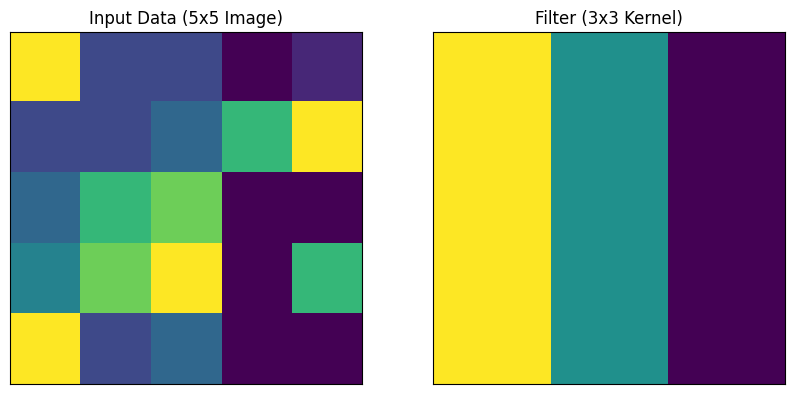

In [ ]:
# 그림에서 왼쪽은 입력 데이터(5x5 이미지)를 나타내고, 오른쪽은 사용된 필터(3x3 커널)를 보여줍니다.
# CNN에서는 이러한 필터를 사용하여 입력 데이터를 슬라이딩 하면서 각 위치에서 필터와의 요소별 곱셈을 수행하고,
# 그 결과들을 합산하여 새로운 피처 맵을 생성합니다. 이 과정을 통해 이미지의 중요한 특징을 추출할 수 있습니다.
import matplotlib.pyplot as plt
import numpy as np

# 임의의 입력 데이터 생성 (5x5 이미지)
# input_data = np.array([[1, 2, 3, 0, 1],
#                        [4, 5, 6, 1, 0],
#                        [7, 8, 9, 0, 1],
#                        [0, 1, 2, 4, 5],
#                        [1, 0, 1, 5, 6]])

# NumPy를 사용하여 랜덤한 5x5 배열 생성
input_data = np.random.randint(0, 10, (5, 5))
print(input_data)

# 임의의 필터 생성 (3x3 필터)
filter_ = np.array([[1, 0, -1],
                    [1, 0, -1],
                    [1, 0, -1]])

# Convolutional operation을 수행하지 않고, 시각화를 위해 입력 데이터와 필터를 그립니다.
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 입력 데이터 시각화
axes[0].matshow(input_data, cmap='viridis')
axes[0].set_title('Input Data (5x5 Image)')
axes[0].set_xticks([])
axes[0].set_yticks([])

# 필터 시각화
axes[1].matshow(filter_, cmap='viridis')
axes[1].set_title('Filter (3x3 Kernel)')
axes[1].set_xticks([])
axes[1].set_yticks([])

plt.show()


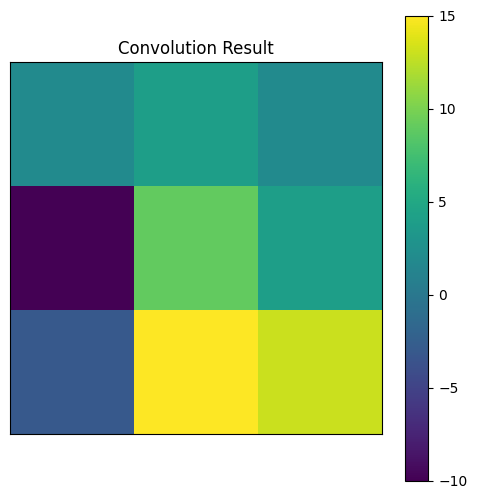

In [ ]:
def convolve2d(input_data, kernel):
    """
    2D Convolution without padding and stride of 1.
    This function applies a 2D convolution operation to a 2D input matrix.

    Parameters:
    - input_data: 2D array of input data
    - kernel: 2D array of the kernel/filter

    Returns:
    - output: 2D array of the convolved results
    """
    kernel_height, kernel_width = kernel.shape
    input_height, input_width = input_data.shape

    # Output dimensions
    output_height = input_height - kernel_height + 1
    output_width = input_width - kernel_width + 1

    # Initialize the output with zeros
    output = np.zeros((output_height, output_width))

    for y in range(output_height):
        for x in range(output_width):
            # Apply the kernel/filter
            output[y, x] = np.sum(input_data[y:y+kernel_height, x:x+kernel_width] * kernel)

    return output

# 이전에 생성된 랜덤 입력 데이터와 필터를 사용하여 convolution 연산 수행
result = convolve2d(input_data, filter_)

# 결과 시각화
plt.figure(figsize=(6, 6))
plt.matshow(result, cmap='viridis', fignum=1)
plt.title('Convolution Result')
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.show()


### 합성곱 신경망을 사용한 이미지 분류

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

### 패션 MNIST 데이터 불러오기

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

### 합성곱 신경망 만들기

### 합성곱 신경망(Convolutional Neural Networks, CNNs)에서 필터(또는 커널)를 여러 개 사용하는 이유

- 특성 추출: 각 필터는 이미지의 다른 특성을 감지하는 역할을 합니다. 예를 들어, 어떤 필터는 가로선을, 다른 필터는 세로선을, 또 다른 필터는 모서리나 특정 패턴을 감지할 수 있습니다. 여러 개의 필터를 사용함으로써, 다양한 특성을 추출하고 이미지를 더 잘 이해할 수 있습니다.

- 복잡한 패턴 학습: 초기 층의 필터가 간단한 특성을 추출하는 데 사용된다면, 네트워크의 깊은 층으로 갈수록 이러한 특성들이 결합되어 더 복잡한 패턴을 학습할 수 있습니다. 예를 들어, 얼굴 인식을 위한 CNN에서는 초기 층이 간단한 가장자리를 감지하는 반면, 더 깊은 층에서는 눈, 코, 입과 같은 특징을 학습하고, 최종적으로는 얼굴 전체의 복잡한 패턴을 인식할 수 있습니다.

- 증가된 모델의 용량: 여러 개의 필터를 사용함으로써, 모델은 더 많은 정보를 처리하고 저장할 수 있게 됩니다. 이는 모델이 더 복잡한 함수를 학습하고, 더 다양한 데이터에 대해 일반화할 수 있게 만듭니다.

- 다양한 해상도의 정보 포착: 다양한 크기의 필터를 사용하면, 다른 해상도에서의 특성을 포착할 수 있습니다. 작은 필터는 미세한 패턴을, 큰 필터는 이미지의 광범위한 구조를 감지할 수 있습니다. 이는 이미지의 다양한 측면을 이해하는 데 도움이 됩니다.

In [ ]:
model = keras.Sequential()

In [ ]:
# padding='same'은 입력 데이터 주변을 0으로 채우는 '제로 패딩'을 의미. padding이 없는 경우는 padding='valid'로 표현
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28,28,1)))

In [ ]:
model.add(keras.layers.MaxPooling2D(2))

In [ ]:
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [ ]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

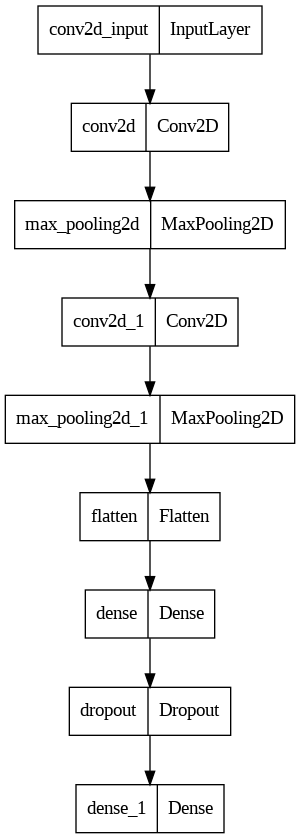

In [ ]:
#  TensorFlow의 Keras API를 사용하여 정의된 신경망 모델의 구조를 시각화
keras.utils.plot_model(model)

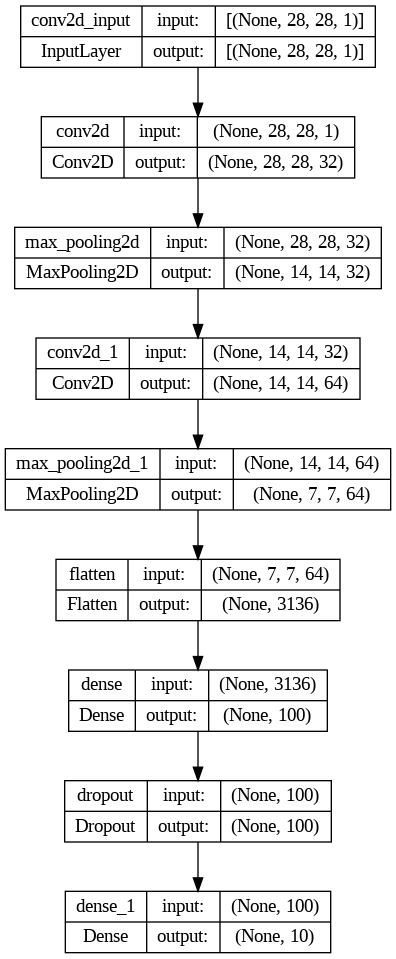

In [ ]:
# 모델의 구조를 'model.png' 파일로 저장하며, 각 레이어에서의 입력과 출력의 형태를 그림에 포함
keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
!ls

drive  model.png  sample_data


## 모델 컴파일과 훈련

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/hjh_kita_directory/Github/kita_231026/m8_vision/best-cnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - ETA: 0s - loss: 0.5061 - accuracy: 0.8190

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 24s 15ms/step - loss: 0.5061 - accuracy: 0.8190 - val_loss: 0.3159 - val_accuracy: 0.8834
Epoch 2/20
1500/1500 [==============================] - 22s 14ms/step - loss: 0.3348 - accuracy: 0.8791 - val_loss: 0.2730 - val_accuracy: 0.8972
Epoch 3/20
1500/1500 [==============================] - 22s 14ms/step - loss: 0.2901 - accuracy: 0.8964 - val_loss: 0.2462 - val_accuracy: 0.9084
Epoch 4/20
1500/1500 [==============================] - 20s 13ms/step - loss: 0.2556 - accuracy: 0.9076 - val_loss: 0.2369 - val_accuracy: 0.9118
Epoch 5/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2333 - accuracy: 0.9150 - val_loss: 0.2286 - val_accuracy: 0.9172
Epoch 6/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2129 - accuracy: 0.9222 - val_loss: 0.2153 - val_accuracy: 0.9222
Epoch 7/20
1500/1500 [==============================] - 20s 13ms/step - loss: 0.1962 - accuracy: 0.9266 - val_loss: 0.2181 - val_accura

In [ ]:
import matplotlib.pyplot as plt

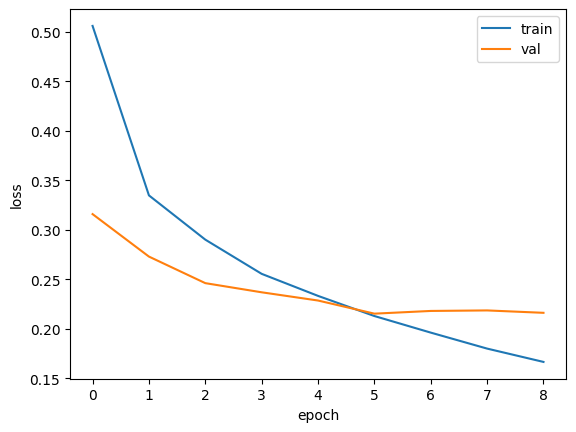

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
# 원래는 두 선 모두 아래로 곡선을 이루며 내려가다가 어느 지점에서 만남.

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 6ms/step - loss: 0.2153 - accuracy: 0.9222


[0.21532629430294037, 0.922166645526886]

In [ ]:
val_scaled.shape

(12000, 28, 28, 1)

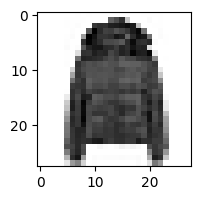

In [ ]:
plt.figure(figsize=(2, 2))
plt.imshow(val_scaled[3].reshape(28, 28), cmap='gray_r')
plt.show()

In [ ]:
# 배열에서 첫 번째 요소(인덱스 0)를 슬라이싱하여 선택합니다.
# 배열 슬라이싱은 인덱싱과 다르게 선택된 원소가 하나이더라도 전체 차원이 유지되어 (1,28,28,1)의 크기를 만든다.
# 여기서 중요한 점은 슬라이싱을 사용함으로써 반환된 데이터의 형태가 원본 배열의 부분집합을 유지한다는 것입니다
preds = model.predict(val_scaled[0:12000])
print(preds)

375/375 [==============================] - 2s 5ms/step
[[2.1882519e-13 1.0249845e-22 2.3393819e-17 ... 1.0227629e-13
  9.9999994e-01 6.0871813e-14]
 [2.7978047e-06 2.7298007e-13 3.4698942e-08 ... 2.1064103e-10
  9.9999708e-01 4.7502657e-10]
 [1.7101565e-11 3.2476832e-12 7.4566707e-12 ... 9.9999803e-01
  5.7433281e-12 2.6457940e-07]
 ...
 [8.1096096e-07 1.4069618e-12 9.9256781e-10 ... 5.5205769e-09
  9.9999851e-01 6.3301975e-08]
 [1.7436169e-07 5.5498564e-14 4.6416362e-10 ... 7.0908107e-10
  9.9999970e-01 2.4229337e-11]
 [1.6439298e-02 6.2479474e-02 4.3924880e-04 ... 1.0919689e-04
  3.8364702e-05 3.2758601e-03]]


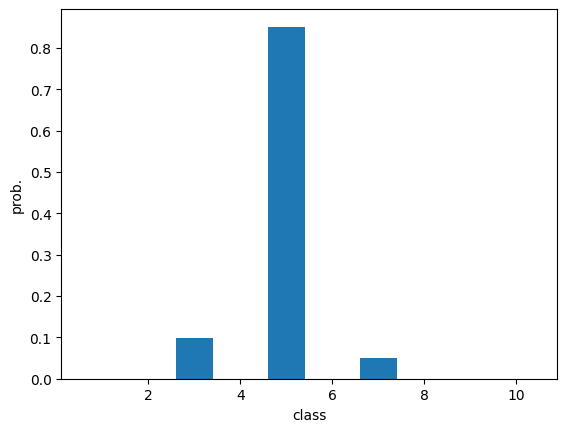

In [ ]:
# 첫 번째 이미지(0번째 인덱스)에 대한 카테고리를 예측하고, 해당 예측에 대한 확률 분포를 반환
plt.bar(range(1, 11), preds[3])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [ ]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [ ]:
import numpy as np
print(classes[np.argmax(preds[11999])])

셔츠


In [ ]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [ ]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 2s 5ms/step - loss: 0.2396 - accuracy: 0.9142


[0.2396143078804016, 0.9142000079154968]